# Universidade de São Paulo
## Escola Politécnica

## EP1 - Eletromagnetismo 2018

Beatriz Soares Passanezi NUSP: 10336167

Felipe Sibuya NUSP:

Lucas Penna NUSP:

## Importando as bibliotecas

In [81]:
import numpy as np 
import matplotlib.pyplot as plt
import math

## Definindo as medidas e constantes

In [82]:
# Definindo as dimensoes do mapa de potencial
#(cm)
a = 11.0
b = 7.0
c = 5.0
d = 4.0
g = 2.0
h = 1.5
# Determinando a condutividade do material
sigma = 0.0032 #[Si/M]
# Definindo a permissividade eletrica do meio
epsilon = 1.9*8.85e-12
# Definindo a espessura do condutor
L = 1 # [m]

## Calculo do potencial a partir do método de diferenças finitas 

In [75]:
#definição da matriz, quantos centimetros vale um quadradinho
dl = 1e-1
#numero de iterações do algoritmo
iteracoes = 1000

Criação da matriz com os potenciais

In [83]:
num_colunas = int(a/dl) + 2 
num_linhas = int(b/dl) + 2

#matriz inicial de zeros
mapa_potencial = np.zeros((num_linhas, num_colunas))
limite = np.zeros((num_linhas, num_colunas))

In [84]:
'''criando a região com potencial de 100V, ela é definida pelos vértices
    
[(g/1dl) + 1, (b - d - h)/dl + 1] [(g+c)/dl + 1, (b - d - h)/dl + 1]

[(g/dl) + 1, (b - h)/dl + 1] [(g+c)/dl + 1, (b - h)/dl + 1]

'''
for coluna in range(int((g/dl)) + 1, int((g+c)/dl) + 1):
    for linha in range(int((b - d - h)/dl) + 1, int((b - h)/dl) + 1):
        mapa_potencial[linha][coluna] = 100
                
for j in range (len(limite[0])):
    limite[0][j]=1
    limite[len(limite)-1][j]=1
    
for i in range (len(limite)):
    limite[i][0]=1
    limite[i][len(limite[0])-1]=1

### Método da relaxação

In [85]:
mapa_potencial = np.array(mapa_potencial, dtype='float64')


for i in range(1, iteracoes):
    for coluna in range(1, num_colunas - 2):
        for linha in range(1, num_linhas - 2):
            #so altero os potenciais diferentes de 100
            if mapa_potencial[linha][coluna] != 100:
                mapa_potencial[linha][coluna] = 0.25*(mapa_potencial[linha-1][coluna] + mapa_potencial[linha+1][coluna] + mapa_potencial[linha][coluna-1] + mapa_potencial[linha][coluna+1])

## Determinação da resistência R e da capacitância C 

Calculo da corrente Is que atravessa o condutor
    - determinação da somatória dos potenciais nas bordas
        

    |--------------(3)----------------|
    |                                 |
    |                                 |
    |                                 |
    (1)							 (2)
    |								 |
    |								 |
    |				     			|
    |--------------(4)----------------|

    

In [86]:
somatoria_parcial_fi_1 = 0
somatoria_parcial_fi_2 = 0
somatoria_parcial_fi_3 = 0
somatoria_parcial_fi_4 = 0

for linha in range(1, num_linhas):
    somatoria_parcial_fi_1 = somatoria_parcial_fi_1 + mapa_potencial[linha][1]
    somatoria_parcial_fi_2 = somatoria_parcial_fi_2 + mapa_potencial[linha][num_colunas-1]

for coluna in range(1, num_colunas):
    somatoria_parcial_fi_3 = somatoria_parcial_fi_3 + mapa_potencial[1][coluna]
    somatoria_parcial_fi_4 = somatoria_parcial_fi_4 + mapa_potencial[num_linhas-1][coluna]



### Calculo da corrente

In [87]:
Is = sigma*L*(somatoria_parcial_fi_1+somatoria_parcial_fi_2+somatoria_parcial_fi_3+somatoria_parcial_fi_4)
print("\n [RESULT] A corrente Is eh: %s [A]" % Is)


 [RESULT] A corrente Is eh: 2.045998148052858 [A]


### Calculo da resistência

In [88]:
R = 100/Is
print("\n [RESULT] A resistencia R eh: %s [Ohm]" % R)


 [RESULT] A resistencia R eh: 48.87589956773339 [Ohm]


### Calculo da capacitancia

In [89]:
C = epsilon / (sigma * R)

print("\n [RESULT] A capacitancia C eh: %s [F]" % C)



 [RESULT] A capacitancia C eh: 1.07510808935965e-10 [F]


## Calculo das densidades superficiais de carga 

Para calcular as densidades superficiais, usaremos a formua Dn1 - Dn2 = ps

In [90]:
def calcula_campo_y(i, j, mapa):
    campo_y = ((mapa[i][j] + mapa[i+1][j] - mapa[i][j+1] - mapa[i+1][j+1])/(2*dl))
    return campo_y

def calcula_campo_x(i, j, mapa):
    campo_y = ((mapa[i][j] + mapa[i][j+1] - mapa[i+1][j] - mapa[i+1][j+1])/(2*dl))
    return campo_y

Cálculo da densidade superficial interna

In [92]:
Dn1_int = epsilon * (calcula_campo_y(int((b-d-h)/dl) + 1, int((g+c/2)/dl), mapa_potencial))
Dn2_int = epsilon * (calcula_campo_y(int((b-d-h)/dl), int((g+c/2)/dl), mapa_potencial))
ps_int = Dn1_int - Dn2_int

print("\n [RESULT] A densidade superficial de carga interna eh: %s [C/m^2]" %ps_int)


 [RESULT] A densidade superficial de carga interna eh: 4.556539776720285e-14 [C/m^2]


Cálculo da densidade superficial externa

In [93]:
Dn1_ext = epsilon * (calcula_campo_y(1, int((g+c/2)/dl), mapa_potencial))
Dn2_ext = epsilon * (calcula_campo_y(0, int((g+c/2)/dl), mapa_potencial))
ps_ext = Dn1_ext - Dn2_ext

print("\n [RESULT] A densidade superficial de carga externa eh: %s [C/m^2]" %ps_ext)



 [RESULT] A densidade superficial de carga externa eh: -8.758537104191837e-14 [C/m^2]


In [94]:
if ps_int < ps_ext:
    print("\n [RESULT] A menor densidade superficial de carga eh: %s [C/m^2]" %ps_int)
else:
    print("\n [RESULT] A menor densidade superficial de carga eh: %s [C/m^2]" %ps_ext)



 [RESULT] A menor densidade superficial de carga eh: -8.758537104191837e-14 [C/m^2]


## Desenhando o mapa de campo em quadrados curvilíneos

In [95]:
x = np.linspace(0.0, a, len(mapa_potencial[0]))
y = np.linspace(0.0, b, len(mapa_potencial))
X, Y = np.meshgrid(x, y)

In [96]:
#numero de linhas de corrente por centímetro
n=5
ptIni1 = list(zip(list(np.linspace(g, c+g, (n*5))),[h+d]*(n*5)))
ptIni2 = list(zip(list([g] * (n*3)), np.linspace(h, h + d, (n*3))))
ptIni3 = list(zip(list(np.linspace(g, c + g, (n*5))), [h] * (n*5)))
ptIni4 = list(zip(list([g + c] * (n*3)), np.linspace(h, h + d, (n*3))))
pontosIniciais = ptIni1 + ptIni2 + ptIni3 + ptIni4

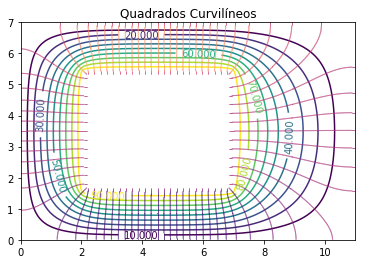

In [97]:
#desenhando as equipotenciais
plt.figure()
CS = plt.contour(X, Y, mapa_potencial, levels = np.linspace(0,100,11), cmap='viridis')
plt.clabel(CS, fontsize=10, inline=1)

#desenhando as linhas de corrente
Ey, Ex = np.gradient(mapa_potencial)
Ex, Ey = (-1) * Ex, (-1) * Ey
plt.streamplot(X, Y, Ex, Ey, color=Ey, linewidth=1, cmap='magma', 
    start_points=pontosIniciais, arrowstyle='-', density=50)

plt.title('Quadrados Curvilíneos')
plt.show()
